In [1]:
from snn_delays.snn import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.experimental_models.snn_delay_prun import P_DelaySNN
from snn_delays.utils.train_utils import train, get_device, propagate_batch, to_plot
from snn_delays.utils.test_behavior import tb_addtask
from snn_delays.utils.visualization_utils import plot_taus
import numpy as np
device = get_device()

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


In [2]:
time_window = 50
batch_size = 128 # 128: anil kag

ckpt_dir = 'sequential_tests_exp27'

dataset = 'addtask_episodic'
#dataset = 'addtask' 

DL = DatasetLoader(dataset=dataset, caching='', num_workers=0, batch_size=batch_size, total_time=time_window)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()
dataset_dict["time_ms"] = 2e3
#dataset_dict["time_ms"] = 50

In [3]:
structure = (48, 2)

snn = P_DelaySNN(dataset_dict, structure=structure, connection_type='f', delay=(100,1), delay_type='h', delay_mask='random', n_pruned_delays=3,
           reset_to_zero=False, win=time_window, loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=True)

snn.set_network()
snn.use_amp = False
snn.model_name = f'addask_d_50'
snn.input2spike_th = None
snn.num_train_samples = batch_size

snn_mf = SNN(dataset_dict, structure=structure, connection_type='mf', delay=None, delay_type='',
           reset_to_zero=False, win=time_window, loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=True)

snn_mf.multi_proj = 3

snn_mf.set_network()
snn_mf.use_amp = False
snn_mf.model_name = f'addask_mf_50'
snn_mf.input2spike_th = None
snn_mf.num_train_samples = batch_size


snn_rnn = SNN(dataset_dict, structure=structure, connection_type='r', delay=None, delay_type='',
           reset_to_zero=False, win=time_window, loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=True)

snn_rnn.set_network()
snn_rnn.use_amp = False
snn_rnn.model_name = f'addask_rnn_50'
snn_rnn.input2spike_th = None
snn_rnn.num_train_samples = batch_size



[INFO] Delays: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

[INFO] Delays o: tensor([0])
2000.0
D

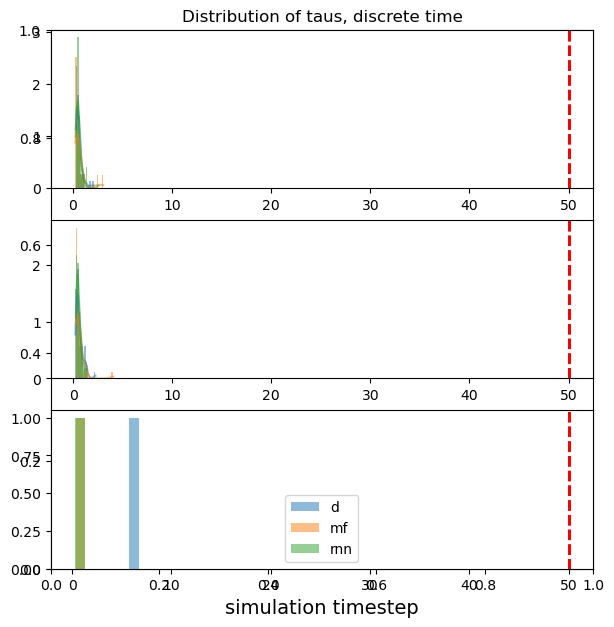

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plot_taus(snn, label='d')
plot_taus(snn_mf, label='mf')
plot_taus(snn_rnn, label='rnn')
plt.legend()

In [5]:
train(snn_mf, train_loader, test_loader, 1e-3, 1000, ckpt_dir=ckpt_dir, test_behavior=tb_addtask, scheduler=(100, 0.95), clear=True)

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\sequential_tests_exp27
Mean Error: 0.0001561443932587281% 
--------------------------


In [6]:
train(snn, train_loader, test_loader, 1e-3, 1000, ckpt_dir=ckpt_dir, test_behavior=tb_addtask, scheduler=(100, 0.95), clear=True)

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\sequential_tests_exp27
Mean Error: 9.937293361872435e-05% 
--------------------------


In [7]:
train(snn_rnn, train_loader, test_loader, 1e-3, 1000, ckpt_dir=ckpt_dir, test_behavior=tb_addtask, scheduler=(100, 0.95), clear=True)

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\sequential_tests_exp27
Mean Error: 0.0014263695338740945% 
--------------------------


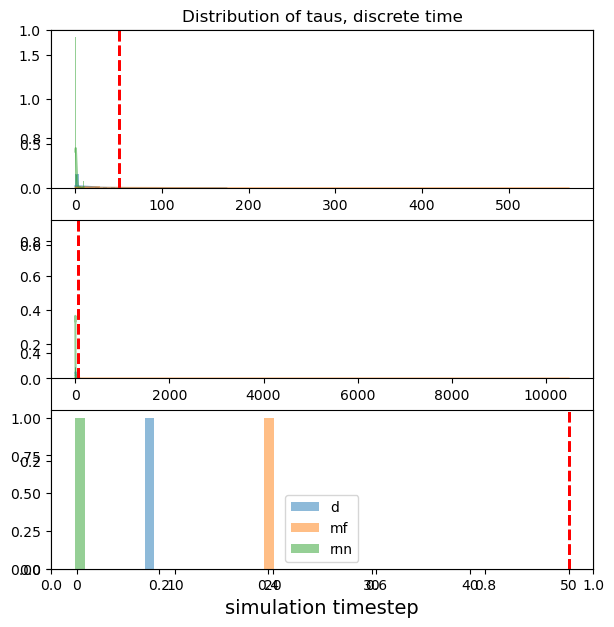

In [8]:
plt.figure(figsize=(7,7))
plot_taus(snn, label='d')
plot_taus(snn_mf, label='mf')
plot_taus(snn_rnn, label='rnn')
plt.legend()

Text(0.5, 1.0, 'train loss')

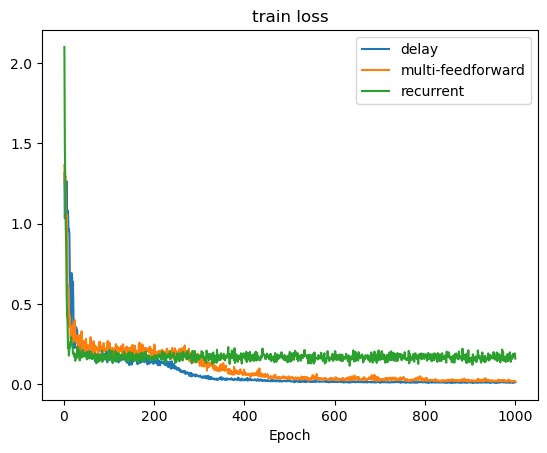

In [10]:
import numpy as np
from snn_delays.utils.visualization_utils import plot_per_epoch
loss_error = np.mean(np.array(snn.train_loss)[:,1][-100:])
plot_per_epoch(snn.train_loss, label = 'delay')
plot_per_epoch(snn_mf.train_loss, label = 'multi-feedforward')
plot_per_epoch(snn_rnn.train_loss, label = 'recurrent')
#plt.title(f'loss error = {loss_error}')

#plt.ylim(0, loss_error)
plt.title('train loss')

<Axes: xlabel='simulation timestep'>

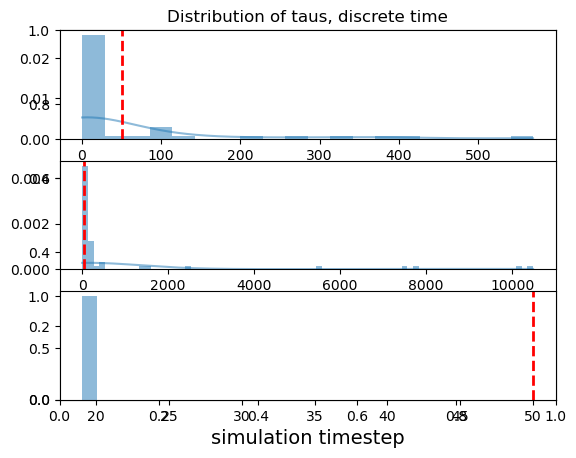

In [15]:
plot_taus(snn_mf, label='mf')

In [ ]:
snn_mf.tau_m_h

[Parameter containing:
 tensor([-4.7716,  5.9177,  4.4736,  0.6941,  6.3435,  5.8288, -3.8153,  5.3679,
         -3.9973, -4.0570, -3.3267, -3.9655, -4.3924, -4.7798, -2.0355,  3.1788,
         -3.2423,  4.5308, -2.5439, -1.0099, -3.2481, -4.1418, -3.8136, -1.7303,
         -3.6497, -3.3276,  4.9448, -4.3131, -0.4609,  5.5792,  3.7603,  4.5592,
         -2.9315, -3.1775, -2.4069, -1.5513, -2.7461, -2.1585,  4.3791, -3.4870,
          0.3322, -2.4801,  6.0089, -0.8602, -2.3201, -4.8347,  4.6152, -4.3488],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 8.9226, -0.6136,  4.3944,  3.1115,  5.0126,  7.3254, -3.1078,  7.8266,
          1.6239, -5.4618,  4.6855,  5.4521,  3.5766,  5.4012,  9.2573,  5.5622,
         -2.3367, -1.9774,  4.5223,  8.6223,  3.8811,  5.0687, -4.1734, -4.1035,
         -5.7201,  2.8549, -5.5447, -4.6853,  9.2286,  5.1293,  2.3478,  7.2035,
         -4.1272,  6.0559,  0.5030, -6.9759, -4.4268,  5.4584,  8.9581, -1.7236,
          6.1968

In [21]:
import torch

delta_t = snn_mf.dataset_dict.get('time_ms', 0)/snn.win

for i, pseudo_tau_m in enumerate(snn_mf.tau_m_h):

    real_tau = -delta_t/torch.log(torch.sigmoid(pseudo_tau_m))
    print(real_tau)
    print(f'average: {torch.mean(real_tau)}')

tensor([8.3682e+00, 1.4881e+04, 3.5267e+03, 9.8731e+01, 2.2772e+04, 1.3618e+04,
        1.0425e+01, 8.5962e+03, 9.9614e+00, 9.8180e+00, 1.1898e+01, 1.0040e+01,
        9.0812e+00, 8.3539e+00, 1.8534e+01, 9.8057e+02, 1.2193e+01, 3.7332e+03,
        1.5270e+01, 3.0292e+01, 1.2172e+01, 9.6210e+00, 1.0429e+01, 2.1125e+01,
        1.0883e+01, 1.1895e+01, 5.6377e+03, 9.2455e+00, 4.2108e+01, 1.0614e+04,
        1.7384e+03, 3.8403e+03, 1.3408e+01, 1.2429e+01, 1.6044e+01, 2.2942e+01,
        1.4243e+01, 1.7638e+01, 3.2104e+03, 1.1373e+01, 7.3969e+01, 1.5622e+01,
        1.6301e+04, 3.2976e+01, 1.6571e+01, 8.2600e+00, 4.0601e+03, 9.1709e+00],
       device='cuda:0', grad_fn=<MulBackward0>)
average: 2378.250244140625
tensor([2.9984e+05, 3.8230e+01, 3.2599e+03, 9.1807e+02, 6.0320e+03, 6.0762e+04,
        1.2692e+01, 1.0028e+05, 2.2232e+02, 7.3179e+00, 4.3546e+03, 9.3502e+03,
        1.4499e+03, 8.8867e+03, 4.1941e+05, 1.0436e+04, 1.6468e+01, 1.8984e+01,
        3.7018e+03, 2.2227e+05, 1.9591e+03, 

In [22]:
images, labels = propagate_batch(snn, test_loader)
_, labels_mf = propagate_batch(snn_mf, test_loader)
_, labels_rnn = propagate_batch(snn_rnn, test_loader)

In [29]:
ref = labels[:,:int(0.1*time_window),0].T.cpu().numpy()
out = snn.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_mf = labels_mf[:,:int(0.1*time_window),0].T.cpu().numpy()
out_mf = snn_mf.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rnn = labels_rnn[:,:int(0.1*time_window),0].T.cpu().numpy()
out_rnn = snn_mf.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

0.031414505
0.009088555
0.028502027


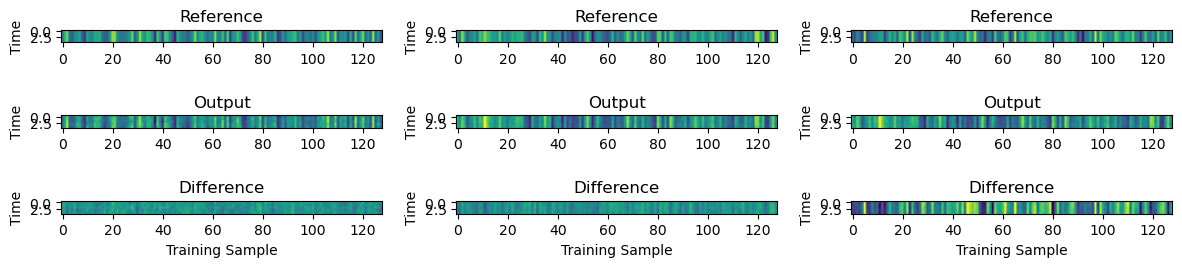

In [30]:
from snn_delays.utils.visualization_utils import plot_add_task, plot_add_task2, plot_add_task3, plot_add_task4
# Create a figure with 3 rows and N columns (for stacking results horizontally)
fig, axes = plt.subplots(3, 3, figsize=(12, 3))  # 3 rows, 3 columns

plot_add_task(out, ref, axes[:, 0])      # First column
plot_add_task(out_mf, ref_mf, axes[:, 1])  # Second column
plot_add_task(out_rnn, ref_rnn, axes[:, 2])  # Third column

plt.tight_layout()
plt.show()

<Axes: xlabel='Index', ylabel='Value'>

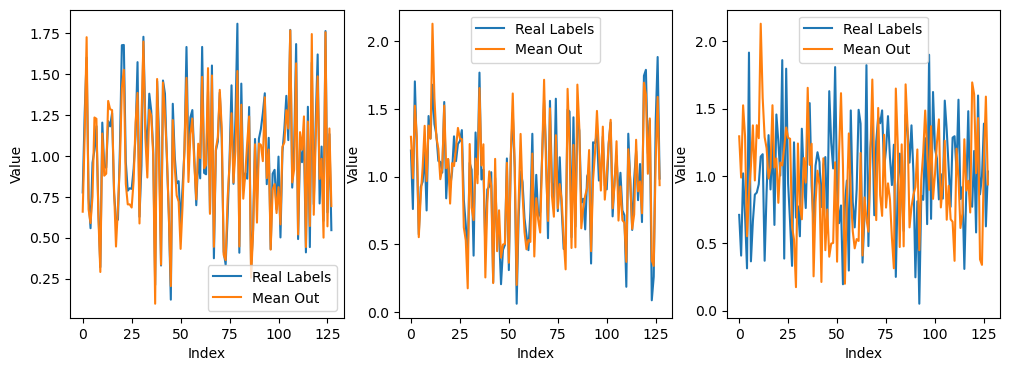

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plot_add_task2(out, labels)
plt.subplot(132)
plot_add_task2(out_mf, labels_mf)
plt.subplot(133)
plot_add_task2(out_rnn, labels_rnn)

<Axes: title={'center': 'output'}, xlabel='training sample', ylabel='time'>

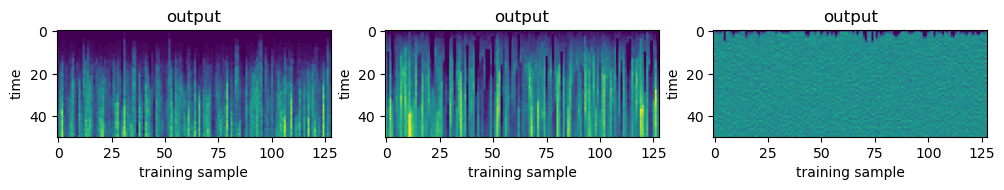

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plot_add_task3(snn)
plt.subplot(132)
plot_add_task3(snn_mf)
plt.subplot(133)
plot_add_task3(snn_rnn)

<Axes: title={'center': 'Dynamics of neuron = 0 of the layer output'}, xlabel='Time (ms)', ylabel='Membrane potential (mV)'>

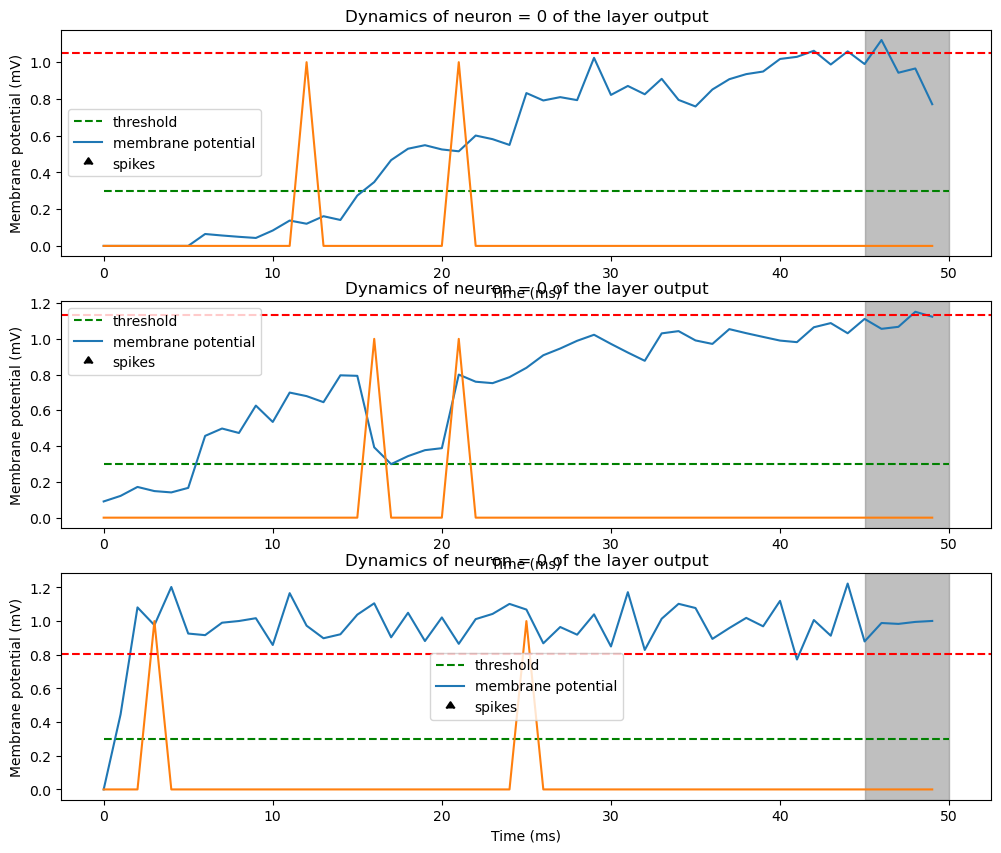

In [33]:
plt.figure(figsize=(12, 10))
plt.subplot(311)
plot_add_task4(snn)
plt.subplot(312)
plot_add_task4(snn_mf)
plt.subplot(313)
plot_add_task4(snn_rnn)

In [34]:
def get_errors_per_lapse(snn, num_trials):

    errors_per_lapse = [ [] for x in range(int(0.8*snn.win))]

    for trial in range(num_trials):

        _, labels = propagate_batch(snn, test_loader)
        ref = labels[:,:5,0].T.cpu().numpy()
        out = snn.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

        input_times = snn.spike_state['input'][:,:,1]

        outs = np.mean(out, axis=0)
        refs = np.mean(ref, axis=0)

        for sample in range(input_times.shape[1]):
            spike_times = torch.where(input_times[:, sample] == 1)[0]  # Get spike times
            dif = (spike_times[1] - spike_times[0]).item()
            errors_per_lapse[dif].append(abs(outs[sample]-refs[sample]))
    
    return errors_per_lapse


In [35]:
errors = get_errors_per_lapse(snn, 100)
errors_mf = get_errors_per_lapse(snn_mf, 100)
errors_rnn = get_errors_per_lapse(snn_rnn, 100)

In [36]:
def plot_errors(errors, label='Mean loss', linestyle='-'):

    # Example data: replace `nested_loss_lists` with your actual data
    #nested_loss_lists = tstloss_d['f_d_2l_hm_ft']

    # Ensure all lists have the same length and epoch indices
    #epochs = [entry[0] for entry in nested_loss_lists[0]]  # Epochs
    times = range(int(0.8*time_window))
    #all_losses = [np.array([entry[1] for entry in lst]) for lst in nested_loss_lists]

    mean_losses = np.array([np.mean(err) for err in errors])
    std_losses = np.array([np.std(err) for err in errors])

    # # Calculate average and standard deviation
    # mean_losses = np.mean(all_losses, axis=0)
    # std_losses = np.std(all_losses, axis=0)

    # Plot the average loss curve with error bars
    #plt.figure(figsize=(10, 6))
    plt.plot(times, mean_losses, label=label, linestyle=linestyle)
    #plt.fill_between(epochs, mean_losses - std_losses, mean_losses + std_losses, color=color, alpha=0.2, label='±1 Std Dev')
    plt.fill_between(times, mean_losses - std_losses, mean_losses + std_losses, alpha=0.2)
    #plt.title("Average Loss Curve")
    plt.xlabel("Interval")
    plt.ylabel("Absolute error")
    plt.legend()
    plt.grid(True)
    
    return plt.gca()

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Interval', ylabel='Absolute error'>

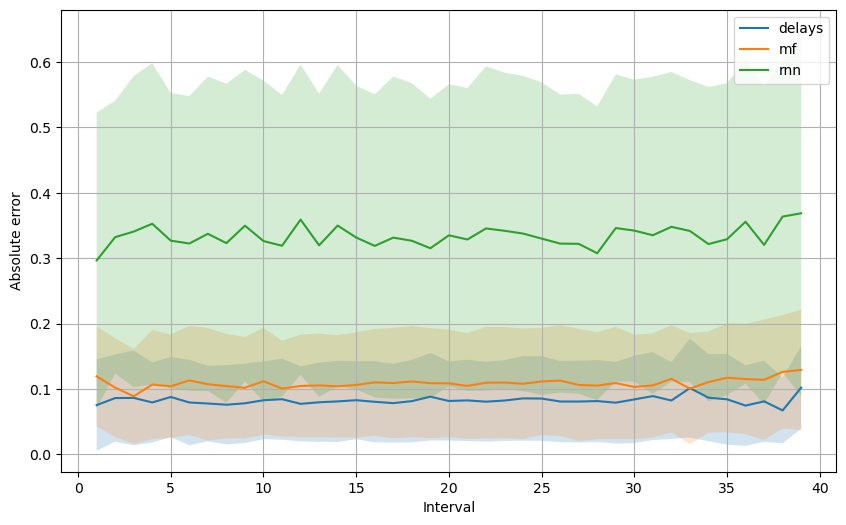

In [37]:
plt.figure(figsize=(10, 6))
plot_errors(errors, 'delays')
plot_errors(errors_mf, 'mf')
plot_errors(errors_rnn, 'rnn')

In [51]:
def propagate_batch_custom(snn, data):
    
    '''
    make first channel of input zero
    '''

    for images, labels in data:

        images = images*0 # make all zeros
        images[:, 10, 1] = 1 # put a single spike in the time 10
        
        snn.propagate(images, labels)
        break

    return images, labels

In [61]:
a, b = propagate_batch_custom(snn, test_loader)
a, b = propagate_batch_custom(snn_mf, test_loader)
a, b = propagate_batch_custom(snn_rnn, test_loader)

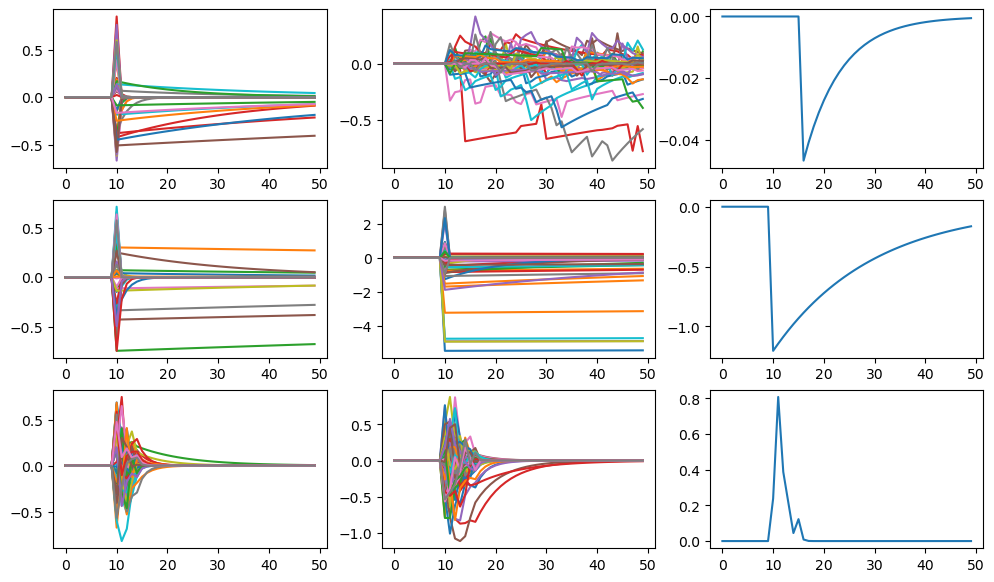

In [70]:
plt.figure(figsize=(12,7))
plt.subplot(3,3,1)
plt.plot(to_plot(snn.mem_state['f1'][:, 0, :]))
plt.subplot(3,3,2)
plt.plot(to_plot(snn.mem_state['f2'][:, 0, :]))
plt.subplot(3,3,3)
plt.plot(to_plot(snn.mem_state['output'][:, 0, :]))
plt.subplot(3,3,4)
plt.plot(to_plot(snn_mf.mem_state['f1'][:, 0, :]))
plt.subplot(3,3,5)
plt.plot(to_plot(snn_mf.mem_state['f2'][:, 0, :]))
plt.subplot(3,3,6)
plt.plot(to_plot(snn_mf.mem_state['output'][:, 0, :]))
plt.subplot(3,3,7)
plt.plot(to_plot(snn_rnn.mem_state['f1'][:, 0, :]))
plt.subplot(3,3,8)
plt.plot(to_plot(snn_rnn.mem_state['f2'][:, 0, :]))
plt.subplot(3,3,9)
plt.plot(to_plot(snn_rnn.mem_state['output'][:, 0, :]))
plt.show()